<a href="https://colab.research.google.com/github/jaybeberry9591/advance_machine_learning/blob/main/MLP_classifier_for_bangla_alphabets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/processed_audio'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[0]
        labels.append(label)

print("Dataset is loaded.")

Dataset is loaded.


In [4]:
labels [:11]

['ঔ', 'অ', 'আ', 'ও', 'ঈ', 'ই', 'ঋ', 'এ', 'ঊ', 'উ', 'ঐ']

In [5]:
paths[:5]

['/content/drive/MyDrive/processed_audio/ঔ_7.wav',
 '/content/drive/MyDrive/processed_audio/অ_7.wav',
 '/content/drive/MyDrive/processed_audio/আ_7.wav',
 '/content/drive/MyDrive/processed_audio/ও_7.wav',
 '/content/drive/MyDrive/processed_audio/ঈ_7.wav']

In [6]:
# Create dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels

In [7]:
df.head()

,speech,label
0,/content/drive/MyDrive/processed_audio/ঔ_7.wav,ঔ
1,/content/drive/MyDrive/processed_audio/অ_7.wav,অ
2,/content/drive/MyDrive/processed_audio/আ_7.wav,আ
3,/content/drive/MyDrive/processed_audio/ও_7.wav,ও
4,/content/drive/MyDrive/processed_audio/ঈ_7.wav,ঈ


In [8]:
df['label'].value_counts()

ঔ    7
অ    7
আ    7
ও    7
ঈ    7
ই    7
ঋ    7
এ    7
ঊ    7
উ    7
ঐ    7
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

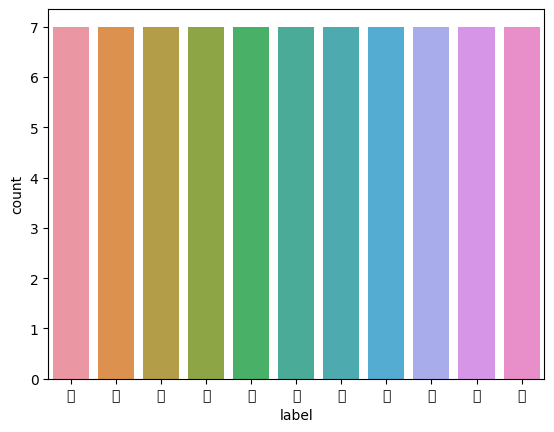

In [11]:
sns.countplot(data=df, x ='label')

In [12]:
# Feature Extraction
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [13]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [14]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(77, 40)

In [15]:
# Input split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


In [16]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [18]:
# MLP Model
model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=50, random_state=42)


In [19]:
# Train the model
model.fit(X_train_scaled, y_train_encoded)

MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=50, random_state=42)

In [20]:
# Predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [21]:
# Evaluate the model
train_accuracy = accuracy_score(y_train_encoded, y_pred_train)
test_accuracy = accuracy_score(y_test_encoded, y_pred_test)

In [22]:

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9508196721311475
Test Accuracy: 0.3125


In [24]:
import matplotlib.pyplot as plt

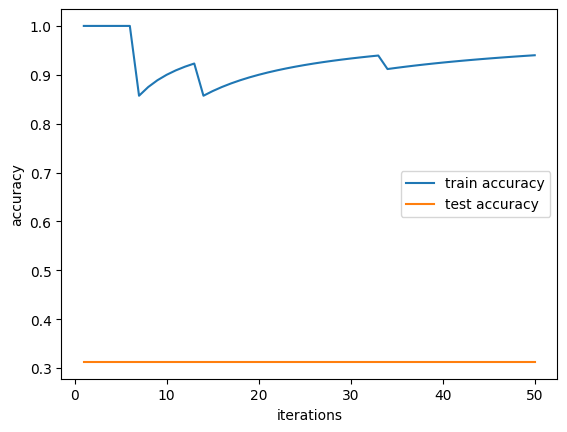

In [27]:
# Plot Results
iterations = list(range(1, model.n_iter_ + 1))
train_accuracy_history = []

for i in range(1, model.n_iter_ + 1):
    partial_train_accuracy = accuracy_score(y_train_encoded[:i], model.predict(X_train_scaled[:i]))
    train_accuracy_history.append(partial_train_accuracy)

test_accuracy_history = [accuracy_score(y_test_encoded, model.predict(X_test_scaled))] * len(iterations)

plt.plot(iterations, train_accuracy_history, label='train accuracy')
plt.plot(iterations, test_accuracy_history, label='test accuracy')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.legend()
plt.show()